### 1)Extraction des données 

In [1]:
import os
from os import listdir, path
import tarfile
import random
import numpy as np
import keras
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#attention au path bien avoir une hierarchie : data -> Dossier suivant dans data : data_test.tar.gz ,data_train.tar.gz, data_train.csv 
if not path.exists('data/data_test/'):
    print('Extracting test image files...')
    tar = tarfile.open("./data/data_test.tar.gz", "r:gz")
    tar.extractall('data/')
if not path.exists('data/data_train/'):
    print('Extracting train image files...')
    tar = tarfile.open("./data/data_train.tar.gz", "r:gz")
    tar.extractall('data/')

### Display utility functions

In [3]:
def show(image):
    plt.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
    plt.title("image shape: "+ str(image.shape), fontsize=14)
    plt.axis('off');
    
def show_multiple(images, figsize):
    fig, ax = plt.subplots(ncols=len(images), figsize=figsize)
    for col, image in zip(ax, images):
        col.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
        col.set_title("image shape: "+ str(image.shape), fontsize=14)
    plt.tight_layout()
    plt.axis('off');

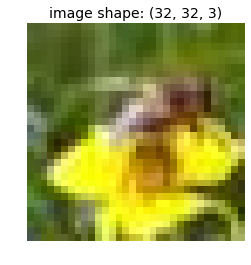

In [4]:
sample_image = imread("./data/data_train/10.jpg")
show(sample_image)

### Importer les Images (Train and Test) et les trier afin qu'elles soient en adéquation avec le fichier CSV

In [5]:
import pandas as pd

def load_data(data_path):
    csv_path = os.path.join(data_path, "labels_train.csv")
    return pd.read_csv(csv_path) # note the returned variable

In [59]:
def conv(v):
    v2 = [s.strip('.jpg') for s in v] # remove the .jpg from the string borders 
    v2 = list(map(int, v2))
    return v2

In [72]:
def int_to_imagepath (v):
    v1 = list(map(str, v))
    #print (v1)
    v1 = [s.replace(s,s+".jpg") for s in v1] 
    return v1

    Id    Category
0    0      rabbit
1    1  chimpanzee
2    2    kangaroo
3    3        bear
4    4      rabbit
5    5    kangaroo
6    6     dolphin
7    7         fox
8    8        wolf
9    9         bee
10  10         bee
y lenght :  7200
X lenght :  7200


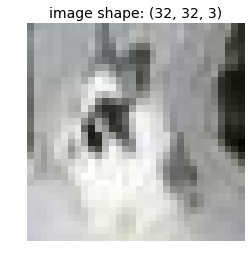

In [74]:
GLOBAL_DATA_PATH = "./data"

X_train = []
files = []
files = listdir(path.join(GLOBAL_DATA_PATH, "data_train"))
files.remove('.ipynb_checkpoints') #Permet de vérifier qu'il n'ai pas d'élément avec ".ipynb_checkpoints"
files2 = conv(files) # convertion string to int
files3 = sorted(files2) # classement ordre croissant
files4 = int_to_imagepath (files3) #converte the sort list to a sort list with ".jpg"
#print("files4",files4)

for file in files4:
    img = load_img(path.join(GLOBAL_DATA_PATH, "data_train", file))
    X_train.append(img_to_array(img))

y_train = load_data(GLOBAL_DATA_PATH) #Pemet de charger les données du CSV

show(X[0])

print(y_train.head(11))
print("y lenght : ",len(y_train))
print("X lenght : ",len(X_train))

In [78]:
X_test = []
files = []
files = listdir(path.join(GLOBAL_DATA_PATH, "data_test"))

for file in files:
    img = load_img(path.join(GLOBAL_DATA_PATH, "data_train", file))
    X_test.append(img_to_array(img))

print("X_test lenght : ",len(X_test))

X_test lenght :  1800
